# Scikit-learn 배우기: 파이썬과 기계 학습

## 3장 : 비지도 학습 - 주요소 분석(PCA, Principal Component Analysis)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


숫자 데이터셋을 로드한다.


In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

In [3]:
print digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']


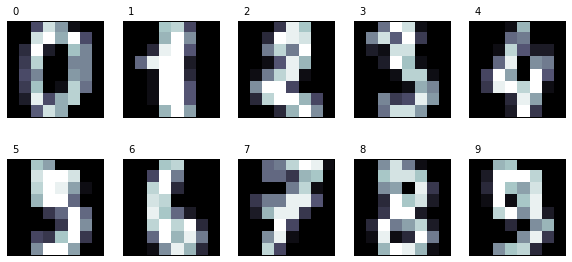

In [4]:
n_row, n_col = 2, 5

def print_digits(images, y, max_n=10):
    # 인치로 그림 사이즈를 설정한다
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # 목적값을 이미지에 적는다
        p.text(0, -1, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)

주요소를 찾고 첫 번째와 두 번째를 도식한다.


In [5]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in xrange(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

C:\Users\chulw\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


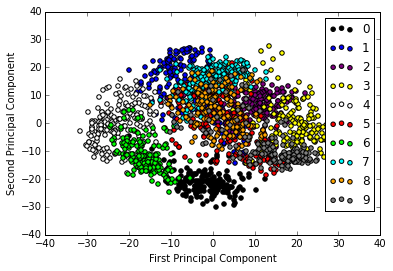

In [6]:
from sklearn.decomposition import PCA

n_components = n_row * n_col
estimator = PCA(n_components=n_components)
X_pca = estimator.fit_transform(X_digits)
plot_pca_scatter()

다른 요소를 출력한다.


In [7]:
def print_pca_components(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((8, 8)), interpolation='nearest')
        plt.text(0, -1, str(i + 1) + '-component')
        plt.xticks(())
        plt.yticks(())

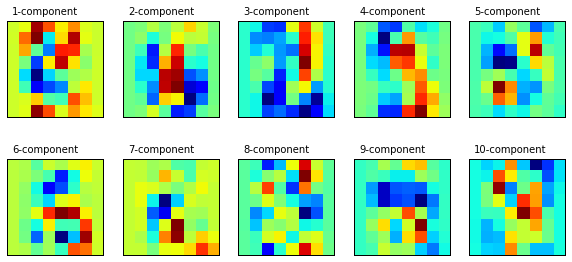

In [8]:
print_pca_components(estimator.components_[:n_components], n_col, n_row)